In [65]:
import os
import uproot
import vector
import awkward as ak
import matplotlib.pylab as plt
import numpy as np

vector.register_awkward()

Let's look at this dataset: [SingleMuon primary dataset in NANOAOD format from RunH of 2016](https://opendata.cern.ch/record/30563)

[Variable list](https://opendata.cern.ch/eos/opendata/cms/dataset-semantics/NanoAOD/30563/SingleMuon_doc.html)

In [79]:
datafile_name = '576759DA-4A35-534B-B926-2A9E4A5A7268.root'

if not (os.path.isfile(datafile_name)): 
    ! curl -O http://opendata.cern.ch//eos/opendata/cms/Run2016H/SingleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/1210000/576759DA-4A35-534B-B926-2A9E4A5A7268.root


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.0M  100 45.0M    0     0  3381k      0  0:00:13  0:00:13 --:--:-- 3525k


In [80]:
infile = uproot.open(datafile_name)

In [81]:
events = infile['Events']
df = events.arrays(filter_name="/(run|event|luminosityBlock|Muon_|nMuon|MET_|Electron_|nElectron)/", library='ak') 
len(df)

56141

Selections:

* $p_{t} >$ 25 GeV
* $|\eta|$ < 2.4
* $m_{T}$ > 40 GeV, where $m_{T} = \sqrt{2p_{t}^{l}p_{t}^{\nu}[1-cos(\Delta\phi)]}$
* reject if another muon or electron with $p_{t} > 10 GeV$

Let's reject events with even one electron and more than one muon

In [82]:
df = df[(df['nMuon'] == 1) & (df['nElectron'] == 0)]
len(df)

36840

Text(0.5, 0, 'muon eta')

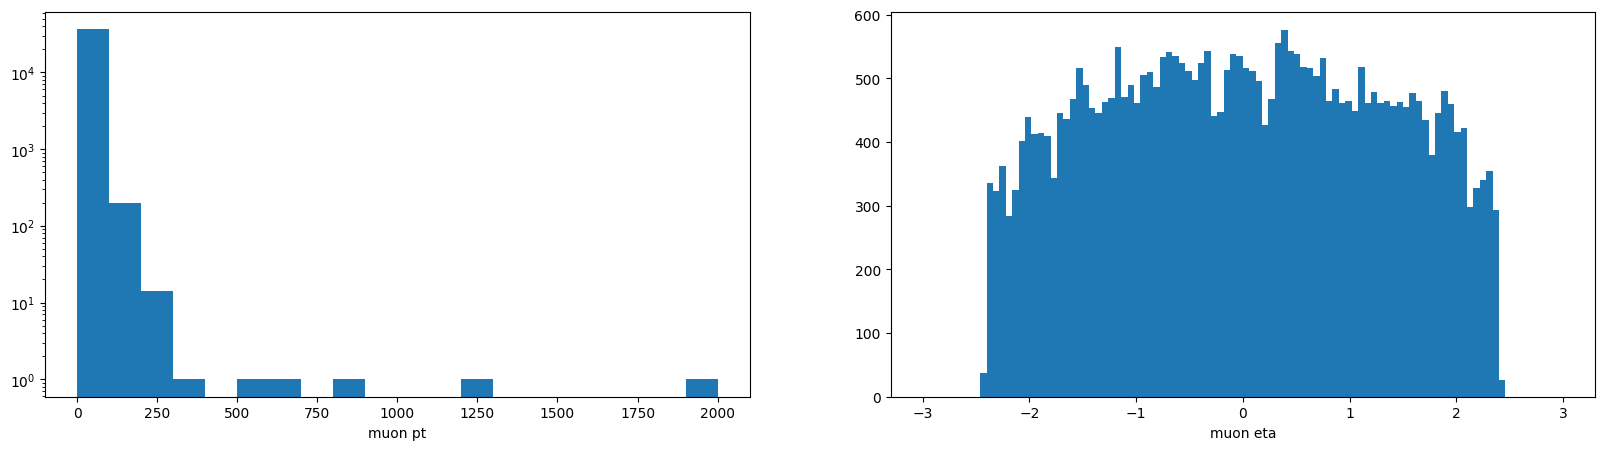

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

axes[0].hist(ak.flatten(df['Muon_pt']), bins=20, range=(0,2000))
axes[0].set_xlabel('muon pt')
axes[0].set_yscale('log')

axes[1].hist(ak.flatten(df['Muon_eta']), bins=100, range=(-3,3))
axes[1].set_xlabel('muon eta')

In [84]:
pt_cut = ak.flatten(df['Muon_pt'] > 25)
eta_cut = ak.flatten(np.abs(df['Muon_eta']) < 2.4)

In [85]:
df = df[pt_cut & eta_cut]
len(df)

27284

Text(0.5, 0, 'muon eta')

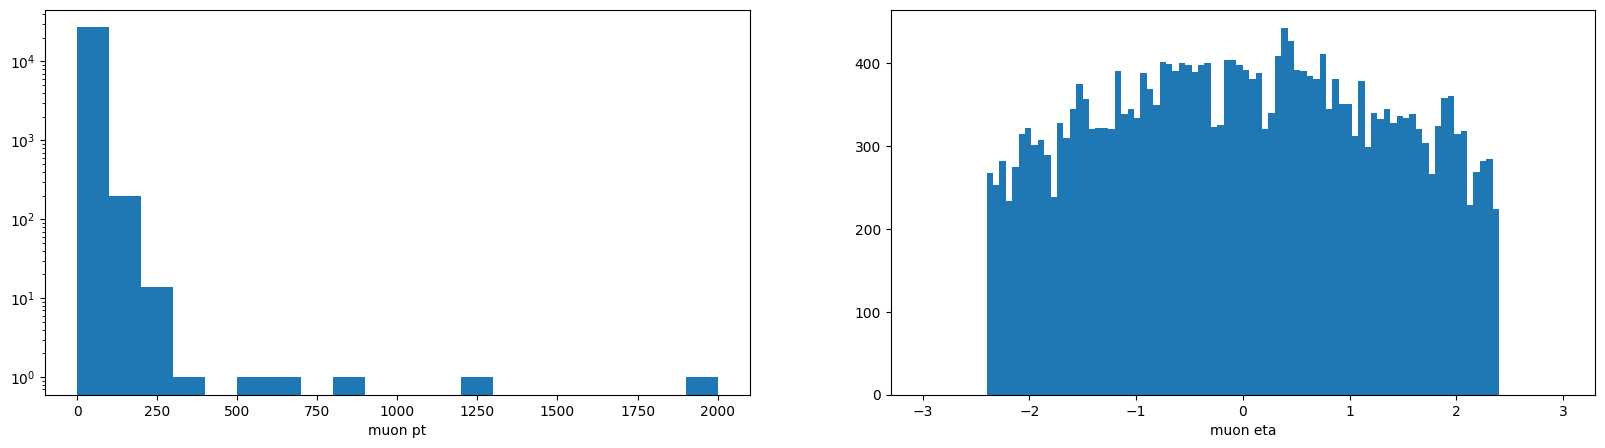

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

axes[0].hist(ak.flatten(df['Muon_pt']), bins=20, range=(0,2000))
axes[0].set_xlabel('muon pt')
axes[0].set_yscale('log')

axes[1].hist(ak.flatten(df['Muon_eta']), bins=100, range=(-3,3))
axes[1].set_xlabel('muon eta')

In [87]:
df['M_t'] = np.sqrt(
    2*df['Muon_pt']*df['MET_pt']*(1-np.cos(df['Muon_phi']-df['MET_phi']))
)

Text(0.5, 0, 'M_t')

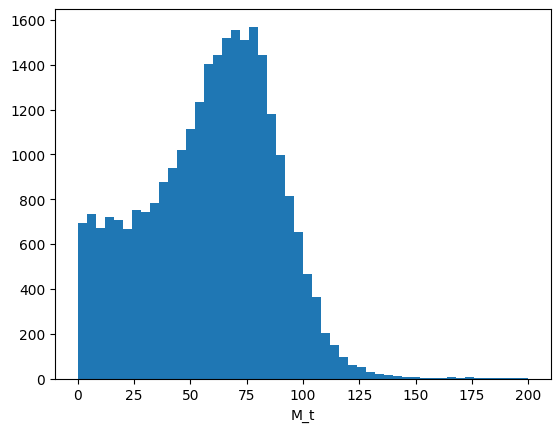

In [88]:
plt.hist(ak.flatten(df['M_t']), bins=50, range=(0,200))
plt.xlabel('M_t')